In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os.path
import numpy as np
import datetime
import os
import geopy
import folium
from scipy import stats

In [2]:
gdf = gpd.read_file("gdf_all_data.geojson") 

df = pd.read_csv("all_data.csv")

In [3]:
gdf_user1 = gdf[gdf['User'] == 'User1']
gdf_user2 = gdf[gdf['User'] == 'User2']
#gdf.tripNr.unique()
display(gdf)

,datetime,time,oriW,oriX,oriY,oriZ,LaccX,LaccY,LaccZ,pressure,...,mode,tripNr,User,recid,d_dist,d_time,vel,acc,vel_corr,geometry
0,2017-06-22 08:46:43.390,1.498121e+12,0.550023,0.449164,-0.564783,-0.420408,-0.595957,-1.372849,0.173059,1005.107631,...,unlabelled,220617.02,User1,220617,0.000000,NaN,NaN,NaN,NaN,POINT (50.84699 -0.13341)
1,2017-06-22 08:46:46.620,1.498121e+12,0.711295,0.667593,-0.021792,0.218854,0.164321,6.407377,-1.372446,1005.113749,...,unlabelled,220617.02,User1,220617,2.664046,3.229999,2.969217,0.285415,2.969217,POINT (50.84696 -0.13339)
2,2017-06-22 08:46:52.430,1.498121e+12,0.704656,0.686372,-0.113010,0.139928,-0.948191,-4.295378,-0.132671,1005.145165,...,Walking,220617.00,User1,220617,0.000000,NaN,NaN,NaN,NaN,POINT (50.84689 -0.13337)
3,2017-06-22 08:46:53.430,1.498121e+12,0.717173,0.672209,-0.103821,0.151705,-0.670852,-4.799349,-0.619527,1005.110957,...,Walking,220617.00,User1,220617,1.026499,1.000000,3.695396,7.181507,3.695396,POINT (50.84689 -0.13338)
4,2017-06-22 08:46:57.440,1.498121e+12,0.729197,0.662254,-0.089967,0.146949,-1.006420,-2.853471,0.186316,1005.147842,...,Walking,220617.00,User1,220617,12.115659,4.009999,10.876903,-1.129117,10.876903,POINT (50.84678 -0.13338)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16037,2017-07-18 15:08:24.720,1.500391e+12,0.398715,-0.005248,0.010691,-0.916997,0.127777,-0.010927,-0.020098,1011.351652,...,unlabelled,180717.02,User2,180717,3.565671,12.060000,NaN,-0.067721,NaN,POINT (51.08306 0.75665)
16038,2017-07-18 15:08:27.720,1.500391e+12,0.395846,-0.011089,0.008797,-0.918207,-0.003984,0.000434,-0.010000,1011.356450,...,unlabelled,180717.02,User2,180717,0.206385,3.000000,NaN,0.034361,NaN,POINT (51.08306 0.75665)
16039,2017-07-18 15:08:43.760,1.500391e+12,0.395932,-0.011232,0.008839,-0.918168,-0.006400,0.011500,0.009258,1011.333291,...,unlabelled,180717.02,User2,180717,1.562757,16.040000,0.350743,-0.017146,0.350743,POINT (51.08305 0.75664)
16040,2017-07-18 15:08:50.810,1.500391e+12,0.395975,-0.011271,0.008755,-0.918149,0.011910,0.009915,-0.009600,1011.347102,...,unlabelled,180717.02,User2,180717,0.148299,7.049999,0.075727,-0.010741,0.075727,POINT (51.08305 0.75664)


In [4]:
gdf_user1.iloc[1:50,6:20]

,LaccX,LaccY,LaccZ,pressure,temp,gyr,mag,grav,accuracy,lat,long,HAGL,mode,tripNr
1,0.164321,6.407377,-1.372446,1005.113749,0.0,0.316696,46.491667,9.806535,48.0,50.846965,-0.133387,118.290886,unlabelled,220617.02
2,-0.948191,-4.295378,-0.132671,1005.145165,0.0,0.307002,43.567174,9.806603,48.0,50.846894,-0.133366,118.368997,Walking,220617.00
3,-0.670852,-4.799349,-0.619527,1005.110957,0.0,0.775573,47.523721,9.806549,48.0,50.846889,-0.133378,118.368997,Walking,220617.00
4,-1.006420,-2.853471,0.186316,1005.147842,0.0,0.766919,48.073665,9.806537,48.0,50.846780,-0.133376,118.455036,Walking,220617.00
5,2.077009,-1.596077,-5.836242,1005.188397,0.0,0.640399,48.730560,9.805912,48.0,50.846687,-0.133410,118.455036,Walking,220617.00
6,-1.098918,-4.058797,0.492881,1005.074037,0.0,0.623895,46.544719,9.806541,16.0,50.846398,-0.133393,118.998849,Walking,220617.00
7,-1.526359,-4.556273,0.744179,1005.048085,0.0,0.958419,48.910518,9.806575,16.0,50.846305,-0.133326,118.931493,Walking,220617.00
8,-1.381276,-5.935998,0.169256,1005.408858,0.0,0.178132,48.640224,9.806605,6.0,50.846482,-0.132889,116.345163,Walking,220617.00
9,-1.107295,5.950733,-2.191692,1005.561116,0.0,0.520244,51.025693,9.806437,8.0,50.846541,-0.132738,114.996634,Walking,220617.00
10,0.117441,-1.786765,1.029308,1005.616940,0.0,0.322501,50.797123,9.806611,6.0,50.846484,-0.132635,114.783002,Walking,220617.00


# data processing

Text(0, 0.5, 'Latitude')

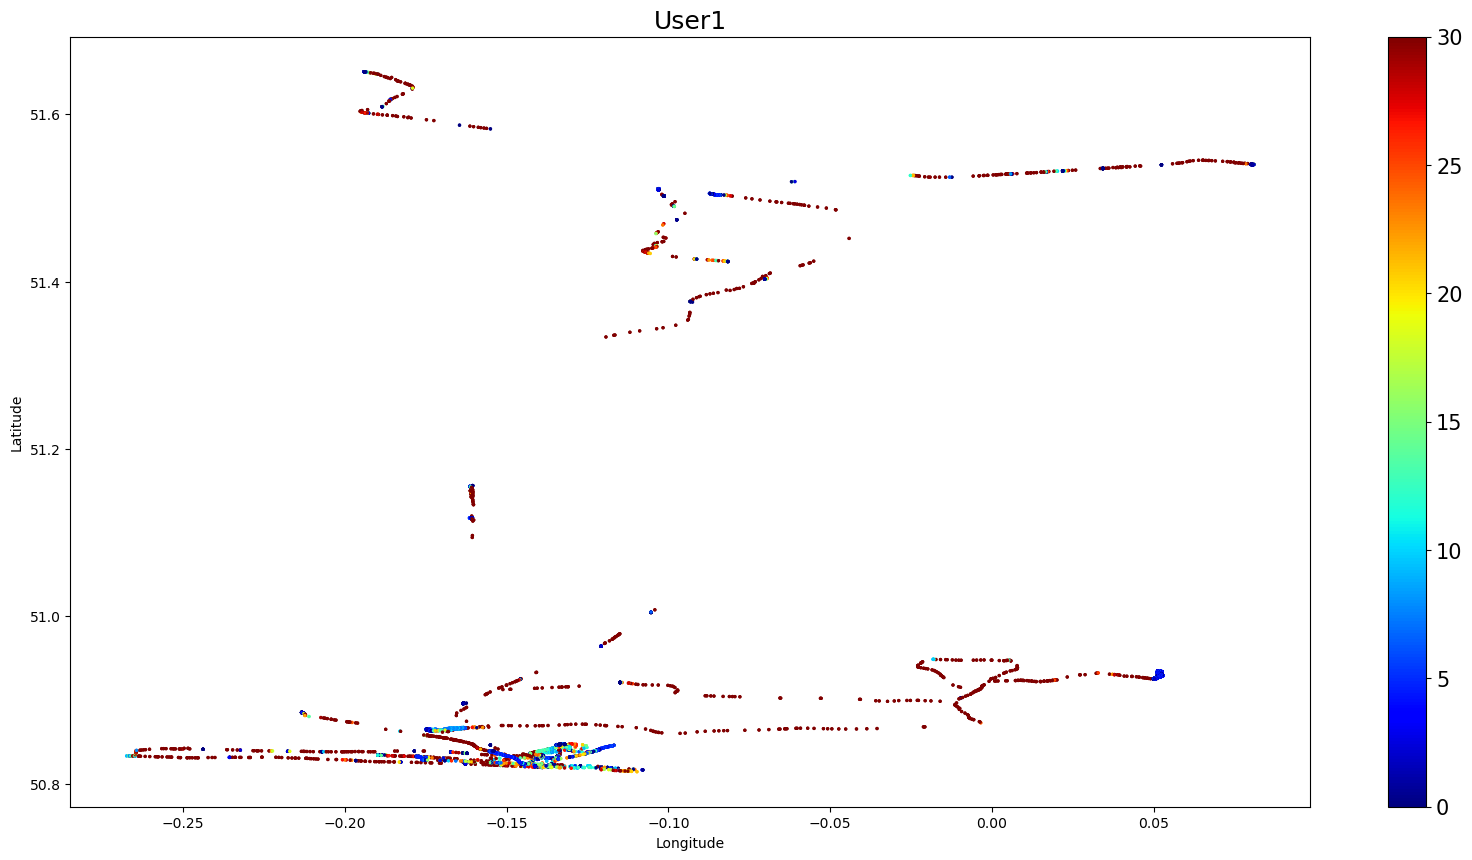

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
plt.rcParams.update({'font.size': 15})

sc1 = ax.scatter(gdf_user1.geometry.y.values,gdf_user1.geometry.x.values,c=gdf_user1.vel,cmap = plt.cm.jet,vmin=0, vmax=30 ,s=2)
ax.scatter(gdf_user1.geometry.y.values,
              gdf_user1.geometry.x.values,
              c=gdf_user1.vel.values,
              cmap = plt.cm.jet,
               vmin=0, vmax=30,
              s=2)
ax.set_title('User1')
fig.colorbar(sc1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [7]:
import datetime
gdf_user1.index=gdf_user1["datetime"]
gdf_user2.index=gdf_user2["datetime"]
gdf_user1["date"]=gdf_user1.index.strftime('%Y/%m/%d')
gdf_user2["date"]=gdf_user2.index.strftime('%Y/%m/%d')
display(gdf_user1)
display(gdf_user2)

E:\anaconda3\envs\ADSE\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
E:\anaconda3\envs\ADSE\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,datetime,time,oriW,oriX,oriY,oriZ,LaccX,LaccY,LaccZ,pressure,...,tripNr,User,recid,d_dist,d_time,vel,acc,vel_corr,geometry,date
datetime,,,,,,,,,,,,,,,,,,,,,
2017-06-22 08:46:43.390,2017-06-22 08:46:43.390,1.498121e+12,0.550023,0.449164,-0.564783,-0.420408,-0.595957,-1.372849,0.173059,1005.107631,...,220617.020,User1,220617,0.000000,NaN,NaN,NaN,NaN,POINT (50.84699 -0.13341),2017/06/22
2017-06-22 08:46:46.620,2017-06-22 08:46:46.620,1.498121e+12,0.711295,0.667593,-0.021792,0.218854,0.164321,6.407377,-1.372446,1005.113749,...,220617.020,User1,220617,2.664046,3.229999,2.969217,0.285415,2.969217,POINT (50.84696 -0.13339),2017/06/22
2017-06-22 08:46:52.430,2017-06-22 08:46:52.430,1.498121e+12,0.704656,0.686372,-0.113010,0.139928,-0.948191,-4.295378,-0.132671,1005.145165,...,220617.000,User1,220617,0.000000,NaN,NaN,NaN,NaN,POINT (50.84689 -0.13337),2017/06/22
2017-06-22 08:46:53.430,2017-06-22 08:46:53.430,1.498121e+12,0.717173,0.672209,-0.103821,0.151705,-0.670852,-4.799349,-0.619527,1005.110957,...,220617.000,User1,220617,1.026499,1.000000,3.695396,7.181507,3.695396,POINT (50.84689 -0.13338),2017/06/22
2017-06-22 08:46:57.440,2017-06-22 08:46:57.440,1.498121e+12,0.729197,0.662254,-0.089967,0.146949,-1.006420,-2.853471,0.186316,1005.147842,...,220617.000,User1,220617,12.115659,4.009999,10.876903,-1.129117,10.876903,POINT (50.84678 -0.13338),2017/06/22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-27 18:25:29.770,2017-06-27 18:25:29.770,1.498588e+12,0.098604,-0.362917,-0.696355,-0.611275,-0.018200,-0.009921,0.019379,995.976847,...,270617.019,User1,270617,8.270347,12.029999,2.474917,0.290482,2.474917,POINT (50.84626 -0.13430),2017/06/27
2017-06-27 18:25:31.770,2017-06-27 18:25:31.770,1.498588e+12,0.098598,-0.362778,-0.696167,-0.611573,0.003987,0.032127,-0.038913,995.992018,...,270617.019,User1,270617,3.316344,2.000000,5.969419,-2.315494,5.969419,POINT (50.84628 -0.13431),2017/06/27
2017-06-27 18:27:41.070,2017-06-27 18:27:41.070,1.498588e+12,0.096907,-0.362329,-0.696789,-0.611401,-0.009542,-0.001200,0.008652,995.968729,...,270617.019,User1,270617,48.071939,129.300000,1.338430,-0.005233,1.338430,POINT (50.84666 -0.13398),2017/06/27


,datetime,time,oriW,oriX,oriY,oriZ,LaccX,LaccY,LaccZ,pressure,...,tripNr,User,recid,d_dist,d_time,vel,acc,vel_corr,geometry,date
datetime,,,,,,,,,,,,,,,,,,,,,
2017-07-14 08:38:10.180,2017-07-14 08:38:10.180,1.500021e+12,0.958567,-0.005887,-0.000623,-0.284803,0.185196,-0.214803,-0.030587,1010.880672,...,140717.04,User2,140717,0.000000,NaN,NaN,NaN,NaN,POINT (50.82600 -0.11974),2017/07/14
2017-07-14 08:38:21.200,2017-07-14 08:38:21.200,1.500022e+12,0.958238,-0.004687,0.000105,-0.285932,-0.042502,0.083689,-0.008364,1010.879697,...,140717.04,User2,140717,13.728291,11.020000,4.484741,-0.257648,4.484741,POINT (50.82607 -0.11957),2017/07/14
2017-07-14 08:38:40.230,2017-07-14 08:38:40.230,1.500022e+12,0.928608,-0.004053,0.001248,-0.371037,0.010265,-0.005500,-0.007165,1010.860306,...,140717.04,User2,140717,8.698080,19.030000,1.645459,-0.086467,1.645459,POINT (50.82614 -0.11952),2017/07/14
2017-07-14 08:38:46.240,2017-07-14 08:38:46.240,1.500022e+12,0.928610,-0.003972,0.001295,-0.371032,-0.005377,0.001928,-0.009700,1010.878059,...,140717.04,User2,140717,0.000000,6.009999,0.000000,1.059618,0.000000,POINT (50.82614 -0.11952),2017/07/14
2017-07-14 08:38:52.280,2017-07-14 08:38:52.280,1.500022e+12,0.928612,-0.004014,0.001337,-0.371027,-0.004875,0.004275,-0.009700,1010.890024,...,140717.04,User2,140717,10.684594,6.040000,6.368301,-1.054354,6.368301,POINT (50.82624 -0.11950),2017/07/14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-18 15:08:24.720,2017-07-18 15:08:24.720,1.500391e+12,0.398715,-0.005248,0.010691,-0.916997,0.127777,-0.010927,-0.020098,1011.351652,...,180717.02,User2,180717,3.565671,12.060000,NaN,-0.067721,NaN,POINT (51.08306 0.75665),2017/07/18
2017-07-18 15:08:27.720,2017-07-18 15:08:27.720,1.500391e+12,0.395846,-0.011089,0.008797,-0.918207,-0.003984,0.000434,-0.010000,1011.356450,...,180717.02,User2,180717,0.206385,3.000000,NaN,0.034361,NaN,POINT (51.08306 0.75665),2017/07/18
2017-07-18 15:08:43.760,2017-07-18 15:08:43.760,1.500391e+12,0.395932,-0.011232,0.008839,-0.918168,-0.006400,0.011500,0.009258,1011.333291,...,180717.02,User2,180717,1.562757,16.040000,0.350743,-0.017146,0.350743,POINT (51.08305 0.75664),2017/07/18


In [9]:
import pandas_alive
import contextily
import time
from folium import plugins
from folium.plugins import HeatMap

In [10]:
def create_Basemap(location_lat_lon):
    hmap = folium.Map(location=location_lat_lon, zoom_start=9, tiles='cartodbpositron')
    return hmap

# create a Heatmap drawing function
def draw_Heatmap(indata, bmap):
    datalist = list(zip(indata.x.values,indata.y.values))
    HeatMap(datalist,
            min_opacity=0.2,
            radius=20, blur=15,
            max_zoom=1).add_to(bmap)
    return bmap

## dynamische Heatmap

In [39]:
lat_lon_u1 = [51.2,-0.1]
basemap_u1 = create_Basemap(lat_lon_u1)
indata = gdf_user1.geometry
datalist = list(zip(indata.x.values,indata.y.values))
data_move = []
date_list_1=list(np.unique(list(gdf_user1['date'])))

for jj in date_list_1:
    list_array=list(zip(gdf_user1[gdf_user1['date']==jj].geometry.x.values,gdf_user1[gdf_user1['date']==jj].geometry.y.values))
    point=[]
    for num in range(len(list_array)):

        #weight.append(1)
        point.append(list(list_array[num]))
    data_move.append(point)
hm = plugins.HeatMapWithTime(data_move, min_opacity=0.2,index=date_list_1,gradient={.3: 'blue', .65: 'orange', 1: 'red'},
            radius=25, blur=0.8)
hm.add_to(basemap_u1)


file_path = r"test1.html"
hm.save(file_path)

In [12]:
lat_lon_u2 = [51.2,0.4]
basemap_u2 = create_Basemap(lat_lon_u2)
data_move2 = []
date_list_2=list(np.unique(list(gdf_user2['date'])))
for jj2 in date_list_2:
    list_array2=list(zip(gdf_user2[gdf_user2['date']==jj2].geometry.x.values,gdf_user2[gdf_user2['date']==jj2].geometry.y.values))
    point2=[]
    for num in range(len(list_array2)):

        #weight.append(1)
        point2.append(list(list_array2[num]))
    data_move2.append(point2)
hm2 = plugins.HeatMapWithTime(data_move2, min_opacity=0.2,index=date_list_2,gradient={.3: 'blue', .65: 'orange', 1: 'red'},radius=15, blur=0.5)
hm2.add_to(basemap_u2)

file_path2 = r"test2.html"
hm2.save(file_path2)

In [51]:
gdf_user1["mode"]
gdf_user1["d_dist"]

datetime
2017-06-22 08:46:43.390     0.000000
2017-06-22 08:46:46.620     2.664046
2017-06-22 08:46:52.430     0.000000
2017-06-22 08:46:53.430     1.026499
2017-06-22 08:46:57.440    12.115659
                             ...    
2017-06-27 18:25:29.770     8.270347
2017-06-27 18:25:31.770     3.316344
2017-06-27 18:27:41.070    48.071939
2017-06-27 18:27:44.080     0.553362
2017-06-27 18:27:48.090     1.820350
Name: d_dist, Length: 8383, dtype: float64

## Neue Dataframe ani_d für Animation

In [106]:
track_list=np.unique(gdf_user1["tripNr"])
ani_d=pd.DataFrame()
ani_d["track_Nr"]=track_list
ani_d["mode"]=None
for i in range(len(ani_d["track_Nr"])):
    for k in range(len(gdf_user1["tripNr"])):
        if ani_d["track_Nr"].iloc[i]==gdf_user1["tripNr"].iloc[k]:
            ani_d["mode"].iloc[i]=gdf_user1["mode"].iloc[k]
ani_d["d_km"]=None
ani_d

C:\Users\12448\AppData\Local\Temp\ipykernel_9340\4084054444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ani_d["mode"].iloc[i]=gdf_user1["mode"].iloc[k]


,track_Nr,mode,d_km
0,220617.000,Walking,None
1,220617.001,Still,None
2,220617.002,Bus,None
3,220617.003,Walking,None
4,220617.004,Car,None
...,...,...,...
59,270617.015,Still,None
60,270617.016,Train,None
61,270617.017,Bike,None
62,270617.018,Still,None


## Datei mit gleichen track_Nr kombiniert

In [107]:
for i in range(len(ani_d["track_Nr"])):
    ani_d["d_km"].iloc[i]=gdf_user1[gdf_user1["tripNr"]==ani_d["track_Nr"].iloc[i]]["d_dist"].sum()/1000
ani_d

C:\Users\12448\AppData\Local\Temp\ipykernel_9340\2001018613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ani_d["d_km"].iloc[i]=gdf_user1[gdf_user1["tripNr"]==ani_d["track_Nr"].iloc[i]]["d_dist"].sum()/1000
C:\Users\12448\AppData\Local\Temp\ipykernel_9340\2001018613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ani_d["d_km"].iloc[i]=gdf_user1[gdf_user1["tripNr"]==ani_d["track_Nr"].iloc[i]]["d_dist"].sum()/1000
C:\Users\12448\AppData\Local\Temp\ipykernel_9340\2001018613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

,track_Nr,mode,d_km
0,220617.000,Walking,0.48963
1,220617.001,Still,0.006828
2,220617.002,Bus,1.777318
3,220617.003,Walking,0.467357
4,220617.004,Car,3.95204
...,...,...,...
59,270617.015,Still,0.093691
60,270617.016,Train,33.82645
61,270617.017,Bike,2.573432
62,270617.018,Still,0.102142


In [108]:
ani_d["date"]=None
for i in range(len(ani_d["track_Nr"])):
    for k in range(len(gdf_user1["tripNr"])):
        if ani_d["track_Nr"].iloc[i]==gdf_user1["tripNr"].iloc[k]:
            ani_d["date"].iloc[i]=gdf_user1["date"].iloc[k]
ani_d

C:\Users\12448\AppData\Local\Temp\ipykernel_9340\2276432787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ani_d["date"].iloc[i]=gdf_user1["date"].iloc[k]


,track_Nr,mode,d_km,date
0,220617.000,Walking,0.48963,2017/06/22
1,220617.001,Still,0.006828,2017/06/22
2,220617.002,Bus,1.777318,2017/06/22
3,220617.003,Walking,0.467357,2017/06/22
4,220617.004,Car,3.95204,2017/06/22
...,...,...,...,...
59,270617.015,Still,0.093691,2017/06/27
60,270617.016,Train,33.82645,2017/06/27
61,270617.017,Bike,2.573432,2017/06/27
62,270617.018,Still,0.102142,2017/06/27


## mode_list: Index von jedem Modus beim Dataframe zusammenfasst

In [125]:
mode_list=[]
for modename in np.unique(ani_d["mode"]):
    mode_list.append(list(ani_d[ani_d["mode"]==modename].index))
mode_list

[[35, 36, 37, 42, 43, 45, 61],
 [2, 22, 23, 25, 28, 29, 30, 31, 33, 38, 40],
 [4, 5, 6, 7, 12, 13, 14, 17, 18],
 [15, 24],
 [1, 21, 27, 50, 54, 59, 62],
 [48, 49, 51, 52, 53, 55],
 [46, 57, 58, 60],
 [0, 3, 8, 9, 10, 11, 16, 20, 26, 32, 34, 39, 41, 47, 56],
 [19, 44, 63]]

## d_km_sum: Distanz bis jetzt per Modus

In [128]:
ani_d["d_km_sum"]=0
i=-1
for modename in np.unique(ani_d["mode"]):
    i+=1
    for num in range(len(mode_list[i])):
        if num == 0:
            ani_d["d_km_sum"].iloc[mode_list[i][num]]=ani_d["d_km"].iloc[mode_list[i][num]]
        else:
            ani_d["d_km_sum"].iloc[mode_list[i][num]]=ani_d["d_km"].iloc[mode_list[i][num]]+ani_d["d_km_sum"].iloc[mode_list[i][num-1]]
ani_d

C:\Users\12448\AppData\Local\Temp\ipykernel_9340\2231828625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ani_d["d_km_sum"].iloc[mode_list[i][num]]=ani_d["d_km"].iloc[mode_list[i][num]]


,track_Nr,mode,d_km,date,d_km_sum
0,220617.000,Walking,0.48963,2017/06/22,0.489630
1,220617.001,Still,0.006828,2017/06/22,0.006828
2,220617.002,Bus,1.777318,2017/06/22,1.777318
3,220617.003,Walking,0.467357,2017/06/22,0.956987
4,220617.004,Car,3.95204,2017/06/22,3.952040
...,...,...,...,...,...
59,270617.015,Still,0.093691,2017/06/27,0.161107
60,270617.016,Train,33.82645,2017/06/27,159.817632
61,270617.017,Bike,2.573432,2017/06/27,19.154637
62,270617.018,Still,0.102142,2017/06/27,0.263248


## Vorbereitung für Animation, Datei als Pivot Tabelle wechseln

In [137]:

pivoted_df = ani_d.pivot(index='track_Nr',columns='mode',values='d_km_sum').fillna(method="ffill")
pivoted_df=pivoted_df.fillna(0)
pivoted_df

mode,Bike,Bus,Car,Run,Still,Subway,Train,Walking,unlabelled
track_Nr,,,,,,,,,
220617.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489630,0.000000
220617.001,0.000000,0.000000,0.000000,0.000000,0.006828,0.000000,0.000000,0.489630,0.000000
220617.002,0.000000,1.777318,0.000000,0.000000,0.006828,0.000000,0.000000,0.489630,0.000000
220617.003,0.000000,1.777318,0.000000,0.000000,0.006828,0.000000,0.000000,0.956987,0.000000
220617.004,0.000000,1.777318,3.952040,0.000000,0.006828,0.000000,0.000000,0.956987,0.000000
...,...,...,...,...,...,...,...,...,...
270617.015,16.581205,40.344845,101.481637,2.974567,0.161107,39.235233,125.991183,9.077852,114.087091
270617.016,16.581205,40.344845,101.481637,2.974567,0.161107,39.235233,159.817632,9.077852,114.087091
270617.017,19.154637,40.344845,101.481637,2.974567,0.161107,39.235233,159.817632,9.077852,114.087091


In [159]:
pivoted_df.plot_animated(filename=r'd_km_user1.gif' ,orientation='v', n_visible=8,steps_per_period=5,title="distance in KM per mode with trip changing", period_fmt='trackNr {x:6.3f}',period_length=500 )

Generating BarChartRace, plotting ['Bike', 'Bus', 'Car', 'Run', 'Still', 'Subway', 'Train', 'Walking', 'unlabelled']


E:\anaconda3\envs\ADSE\lib\site-packages\pandas_alive\charts.py:227: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.df.columns, ha="right")
E:\anaconda3\envs\ADSE\lib\site-packages\pandas_alive\charts.py:228: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([max_val] * len(ax.get_yticks()))
E:\anaconda3\envs\ADSE\lib\site-packages\pandas_alive\charts.py:187: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha="right", rotation=30)


BarChartRace(df=mode              Bike        Bus         Car       Run     Still     Subway  \
track_Nr                                                                       
220617.0000   0.000000   0.000000    0.000000  0.000000  0.000000   0.000000   
220617.0002   0.000000   0.000000    0.000000  0.000000  0.001366   0.000000   
220617.0004   0.000000   0.000000    0.000000  0.000000  0.002731   0.000000   
220617.0006   0.000000   0.000000    0.000000  0.000000  0.004097   0.000000   
220617.0008   0.000000   0.000000    0.000000  0.000000  0.005462   0.000000   
...                ...        ...         ...       ...       ...        ...   
270617.0182  19.154637  40.344845  101.481637  2.974567  0.263248  39.235233   
270617.0184  19.154637  40.344845  101.481637  2.974567  0.263248  39.235233   
270617.0186  19.154637  40.344845  101.481637  2.974567  0.263248  39.235233   
270617.0188  19.154637  40.344845  101.481637  2.974567  0.263248  39.235233   
270617.0190  19.154637  

## Gleiche Methode für USER2

In [168]:
track_list_2=np.unique(gdf_user2["tripNr"])
ani_d_2=pd.DataFrame()
ani_d_2["track_Nr"]=track_list_2
ani_d_2["mode"]=None
for i in range(len(ani_d_2["track_Nr"])):
    for k in range(len(gdf_user2["tripNr"])):
        if ani_d_2["track_Nr"].iloc[i]==gdf_user2["tripNr"].iloc[k]:
            ani_d_2["mode"].iloc[i]=gdf_user2["mode"].iloc[k]
ani_d_2["d_km"]=None

for i in range(len(ani_d_2["track_Nr"])):
    ani_d_2["d_km"].iloc[i]=gdf_user2[gdf_user2["tripNr"]==ani_d_2["track_Nr"].iloc[i]]["d_dist"].sum()/1000

ani_d_2["date"]=None
for i in range(len(ani_d_2["track_Nr"])):
    for k in range(len(gdf_user2["tripNr"])):
        if ani_d_2["track_Nr"].iloc[i]==gdf_user2["tripNr"].iloc[k]:
            ani_d_2["date"].iloc[i]=gdf_user2["date"].iloc[k]
mode_list2=[]
for modename in np.unique(ani_d_2["mode"]):
    mode_list2.append(list(ani_d_2[ani_d_2["mode"]==modename].index))

ani_d_2["d_km_sum"]=0
i2=-1
for modename in np.unique(ani_d_2["mode"]):
    i2+=1
    for num in range(len(mode_list2[i2])):
        if num == 0:
            ani_d_2["d_km_sum"].iloc[mode_list2[i2][num]]=ani_d_2["d_km"].iloc[mode_list2[i2][num]]
        else:
            ani_d_2["d_km_sum"].iloc[mode_list2[i2][num]]=ani_d_2["d_km"].iloc[mode_list2[i2][num]]+ani_d_2["d_km_sum"].iloc[mode_list2[i2][num-1]]
ani_d_2

C:\Users\12448\AppData\Local\Temp\ipykernel_9340\1883294332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ani_d_2["mode"].iloc[i]=gdf_user2["mode"].iloc[k]
C:\Users\12448\AppData\Local\Temp\ipykernel_9340\1883294332.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ani_d_2["d_km"].iloc[i]=gdf_user2[gdf_user2["tripNr"]==ani_d_2["track_Nr"].iloc[i]]["d_dist"].sum()/1000
C:\Users\12448\AppData\Local\Temp\ipykernel_9340\1883294332.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,track_Nr,mode,d_km,date,d_km_sum
0,140617.000,Run,0.725331,2017/06/14,0.725331
1,140617.001,Walking,0.257166,2017/06/14,0.257166
2,140617.002,Run,0.807917,2017/06/14,1.533248
3,140617.003,Walking,0.227278,2017/06/14,0.484444
4,140617.004,Run,0.786321,2017/06/14,2.319569
...,...,...,...,...,...
87,180717.016,Car,34.446019,2017/07/18,174.972812
88,180717.017,Walking,0.14611,2017/07/18,15.347414
89,180717.018,Car,18.214098,2017/07/18,193.186910
90,180717.019,Still,0.575138,2017/07/18,2.221381


In [170]:
pivoted_df2 = ani_d_2.pivot(index='track_Nr',columns='mode',values='d_km_sum').fillna(method="ffill")
pivoted_df2=pivoted_df2.fillna(0)
pivoted_df2.plot_animated(filename=r'd_km_user2.gif' ,orientation='v', n_visible=8,steps_per_period=8,title="distance in KM per mode with trip changing", period_fmt='trackNr {x:6.3f}',period_length=300 )

Generating BarChartRace, plotting ['Bike', 'Bus', 'Car', 'Run', 'Still', 'Subway', 'Train', 'Walking', 'unlabelled']


E:\anaconda3\envs\ADSE\lib\site-packages\pandas_alive\charts.py:227: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.df.columns, ha="right")
E:\anaconda3\envs\ADSE\lib\site-packages\pandas_alive\charts.py:228: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([max_val] * len(ax.get_yticks()))
E:\anaconda3\envs\ADSE\lib\site-packages\pandas_alive\charts.py:187: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha="right", rotation=30)


BarChartRace(df=mode                Bike        Bus        Car       Run     Still     Subway  \
track_Nr                                                                        
140617.000000   0.000000   0.000000    0.00000  0.725331  0.000000   0.000000   
140617.000125   0.000000   0.000000    0.00000  0.725331  0.000000   0.000000   
140617.000250   0.000000   0.000000    0.00000  0.725331  0.000000   0.000000   
140617.000375   0.000000   0.000000    0.00000  0.725331  0.000000   0.000000   
140617.000500   0.000000   0.000000    0.00000  0.725331  0.000000   0.000000   
...                  ...        ...        ...       ...       ...        ...   
180717.019500  23.919691  12.427854  193.18691  2.319569  2.221381  56.737668   
180717.019625  23.919691  12.427854  193.18691  2.319569  2.221381  56.737668   
180717.019750  23.919691  12.427854  193.18691  2.319569  2.221381  56.737668   
180717.019875  23.919691  12.427854  193.18691  2.319569  2.221381  56.737668   
180717.02000